<a href="https://colab.research.google.com/github/singhing/ml_repo_077-/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import** **libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import cufflinks as cf


**IMPORT** **DATASET**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/framingham.csv")

In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [ ]:
data['TenYearCHD']

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [ ]:
data.groupby('TenYearCHD').size()

TenYearCHD
0    3594
1     644
dtype: int64

In [ ]:
data.shape

(4238, 16)

In [ ]:
data.size

67808

In [ ]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

**descriptive** **statistics** **of** **dataset**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
data.dropna(inplace=True, axis=0, subset=['glucose','BPMeds','totChol','education'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3693 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3693 non-null   int64  
 1   age              3693 non-null   int64  
 2   education        3693 non-null   float64
 3   currentSmoker    3693 non-null   int64  
 4   cigsPerDay       3670 non-null   float64
 5   BPMeds           3693 non-null   float64
 6   prevalentStroke  3693 non-null   int64  
 7   prevalentHyp     3693 non-null   int64  
 8   diabetes         3693 non-null   int64  
 9   totChol          3693 non-null   float64
 10  sysBP            3693 non-null   float64
 11  diaBP            3693 non-null   float64
 12  BMI              3680 non-null   float64
 13  heartRate        3692 non-null   float64
 14  glucose          3693 non-null   float64
 15  TenYearCHD       3693 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 490.5 KB


In [ ]:
numerical_columns=['cigsPerDay','BMI','heartRate']

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values= np.NaN, strategy='median')
data[numerical_columns]=imputer.fit_transform(data[numerical_columns])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3693 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3693 non-null   int64  
 1   age              3693 non-null   int64  
 2   education        3693 non-null   float64
 3   currentSmoker    3693 non-null   int64  
 4   cigsPerDay       3693 non-null   float64
 5   BPMeds           3693 non-null   float64
 6   prevalentStroke  3693 non-null   int64  
 7   prevalentHyp     3693 non-null   int64  
 8   diabetes         3693 non-null   int64  
 9   totChol          3693 non-null   float64
 10  sysBP            3693 non-null   float64
 11  diaBP            3693 non-null   float64
 12  BMI              3693 non-null   float64
 13  heartRate        3693 non-null   float64
 14  glucose          3693 non-null   float64
 15  TenYearCHD       3693 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 490.5 KB


In [ ]:
data['age'].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 35, 60, 36,
       59, 54, 37, 53, 49, 65, 51, 62, 40, 56, 67, 57, 66, 64, 55, 58, 68,
       34, 33, 70, 32, 69])

In [ ]:
data['male'].unique()

array([1, 0])

In [ ]:
data['heartRate'].unique()

array([ 80.,  95.,  75.,  65.,  85.,  77.,  60.,  79.,  76.,  93.,  72.,
        98.,  64.,  70.,  71.,  62.,  73.,  90.,  96.,  68.,  63.,  88.,
        78.,  83., 100.,  84.,  57.,  50.,  74.,  86.,  55.,  92.,  66.,
        87., 110.,  81.,  56.,  89.,  82.,  54.,  69.,  67.,  52.,  61.,
       140., 130.,  58., 104.,  94., 105.,  91.,  53., 108., 106.,  59.,
       107.,  48., 112., 125., 103.,  44.,  47.,  45.,  97., 122., 102.,
       120.,  99., 115., 143., 101.,  46.])

In [ ]:
data['TenYearCHD'].unique()

array([0, 1])

**VISUALISING** **DATASET**

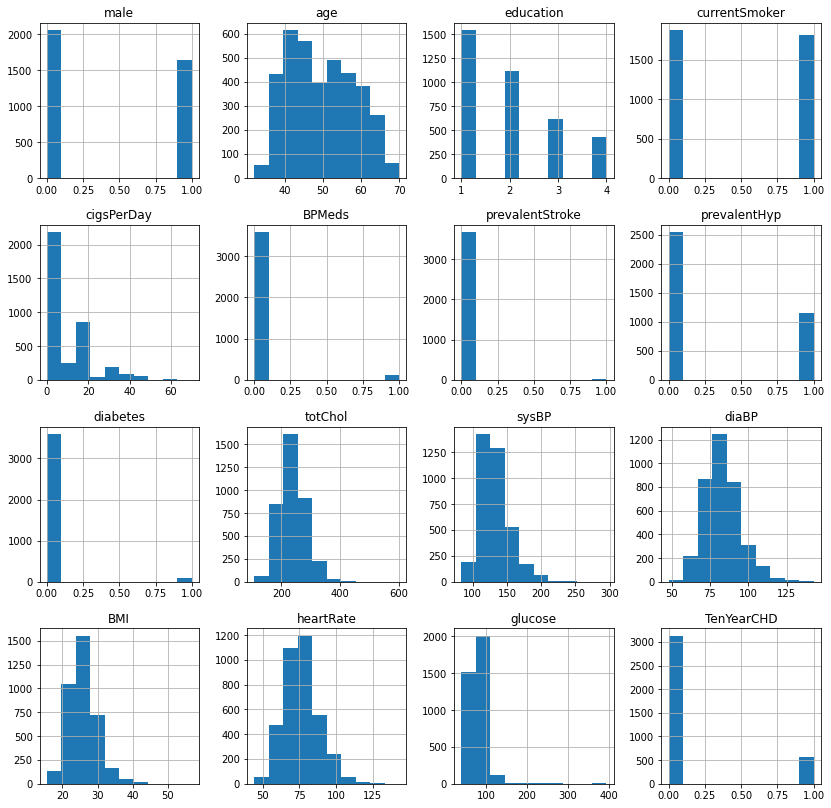

In [ ]:
data.hist(figsize=(14,14))
plt.show()

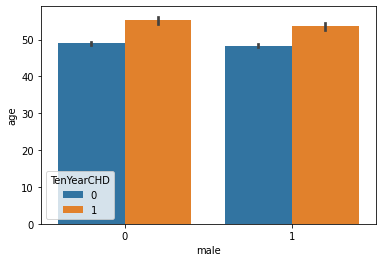

In [ ]:
sns.barplot(x=data['male'], y=data['age'], hue=data['TenYearCHD'] )
plt.show()

In [ ]:
px.bar(data,data['male'],data['TenYearCHD'])

<Figure size 864x720 with 0 Axes>

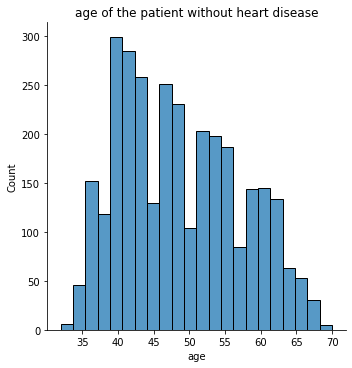

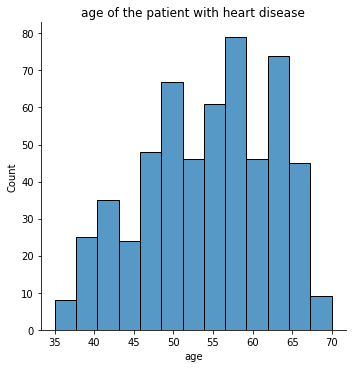

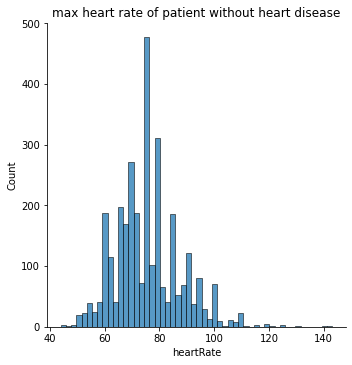

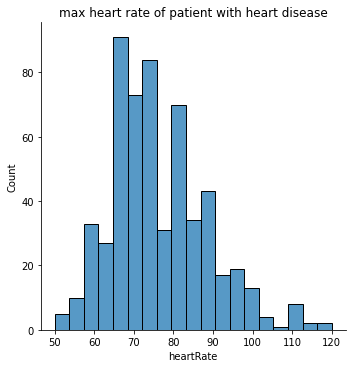

In [ ]:
#create four displots
plt.figure(figsize=(12,10))
#plt.subplot(221)
sns.displot(data[data['TenYearCHD']==0].age)
plt.title("age of the patient without heart disease")

#plt.subplot(222)
sns.displot(data[data['TenYearCHD']==1].age)
plt.title("age of the patient with heart disease")

#plt.subplot(223)
sns.displot(data[data['TenYearCHD']==0].heartRate)
plt.title("max heart rate of patient without heart disease")

#plt.subplot(223)
sns.displot(data[data['TenYearCHD']==1].heartRate)
plt.title("max heart rate of patient with heart disease")
plt.show()


<function matplotlib.pyplot.show>

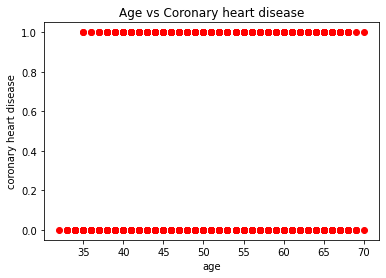

In [ ]:
plt.scatter(x=data['age'], y=data['TenYearCHD'], color='red')
plt.xlabel('age')
plt.ylabel('coronary heart disease')
plt.title('Age vs Coronary heart disease')
plt.show

<function matplotlib.pyplot.show>

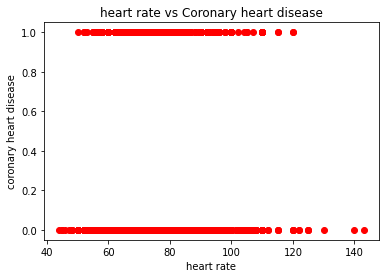

In [ ]:
plt.scatter(y=data['TenYearCHD'], x=data['heartRate'], color='red')
plt.xlabel('heart rate')
plt.ylabel('coronary heart disease')
plt.title('heart rate vs Coronary heart disease')
plt.show

<function matplotlib.pyplot.show>

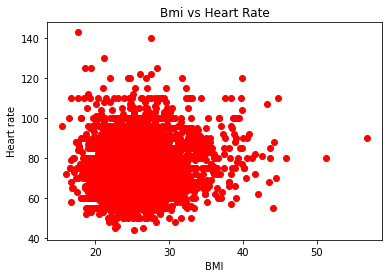

In [ ]:
plt.scatter(x=data['BMI'], y=data['heartRate'], color='red')
plt.xlabel('BMI')
plt.ylabel('Heart rate')
plt.title('Bmi vs Heart Rate')
plt.show

<function matplotlib.pyplot.show>

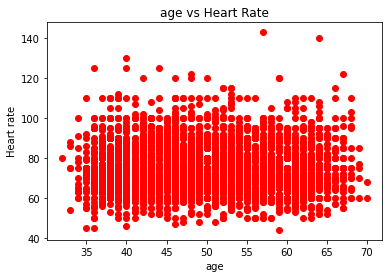

In [ ]:
plt.scatter(x=data['age'], y=data['heartRate'], color='red')
plt.xlabel('age')
plt.ylabel('Heart rate')
plt.title('age vs Heart Rate')
plt.show

<function matplotlib.pyplot.show>

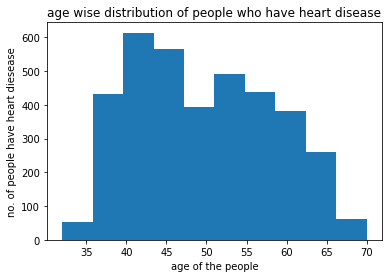

In [ ]:
plt.hist(data['age'], bins=10)
plt.xlabel("age of the people")
plt.ylabel("no. of people have heart diesease")
plt.title("age wise distribution of people who have heart disease")
plt.show

<function matplotlib.pyplot.show>

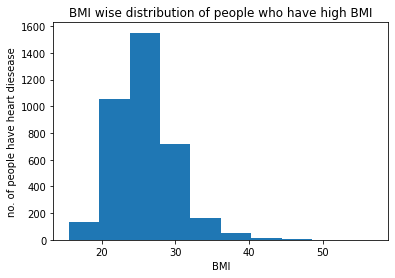

In [ ]:
plt.hist(data['BMI'], bins=10)
plt.xlabel("BMI")
plt.ylabel("no. of people have heart diesease")
plt.title("BMI wise distribution of people who have high BMI")
plt.show

**DATA** **PREPROCESSING**

In [ ]:

X = data.drop(['TenYearCHD'],axis=1)
y= data['TenYearCHD']

In [ ]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [ ]:
scaled_X

array([[ 1.1200798 , -1.23310919,  1.97783189, ...,  0.29154269,
         0.35378757, -0.20390672],
       [-0.89279353, -0.41622926,  0.02040641, ...,  0.72526731,
         1.60454146, -0.24542099],
       [ 1.1200798 , -0.18283499, -0.95830632, ..., -0.11014545,
        -0.06313039, -0.49450666],
       ...,
       [ 1.1200798 ,  0.05055928, -0.95830632, ...,  0.04510825,
        -0.81358272,  0.16972179],
       [ 1.1200798 ,  0.16725641,  0.99911915, ..., -1.49757137,
        -0.89696631, -0.57753522],
       [-0.89279353,  0.28395354,  0.02040641, ..., -1.06384675,
         0.35378757,  1.04152164]])

In [ ]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0


In [ ]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3693, dtype: int64

In [ ]:
y.size

3693

In [ ]:
X.size

55395

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y, random_state=101, test_size=0.3, stratify=y)

In [ ]:
X_train.shape

(2585, 15)

In [ ]:
X_test.shape

(1108, 15)

In [ ]:
y_test.size

1108

**DECISION** **TREE** **ALGORITHM**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_features=12)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
X_test

array([[-0.89279353,  1.56762201, -0.95830632, ..., -1.16734922,
         0.77070553, -0.36996383],
       [-0.89279353, -0.76632066, -0.95830632, ..., -0.84452009,
        -1.48065146, -0.49450666],
       [ 1.1200798 , -0.64962352,  0.02040641, ..., -0.86177051,
        -0.89696631,  0.00366468],
       ...,
       [-0.89279353, -1.23310919,  0.99911915, ..., -0.03621512,
        -0.06313039, -0.28693527],
       [-0.89279353,  1.10083348, -0.95830632, ..., -0.1126098 ,
        -0.06313039, -0.57753522],
       [-0.89279353, -0.18283499, -0.95830632, ...,  0.69323083,
        -0.06313039, -0.28693527]])

In [ ]:
prediction=dt.predict(X_test)

In [ ]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

316     0
1004    0
58      0
3721    0
1223    0
       ..
2272    0
4224    0
1734    0
1197    0
1742    0
Name: TenYearCHD, Length: 1108, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_dt=accuracy_score(y_test,prediction)*100

In [ ]:
accuracy_dt

75.72202166064982

In [ ]:
dt.feature_importances_

array([0.01643397, 0.12906649, 0.02724742, 0.00768782, 0.05082673,
       0.00396791, 0.00427445, 0.00786205, 0.        , 0.1190317 ,
       0.1474287 , 0.14389427, 0.15478919, 0.07570044, 0.11178887])

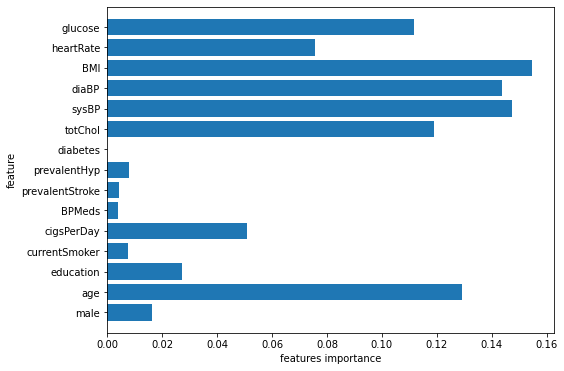

In [ ]:
def plot_feature_importance(model):
  plt.figure(figsize=(8,6))
  n_features=15
  plt.barh(range(n_features),model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features),X)
  plt.xlabel("features importance")
  plt.ylabel("feature")
  plt.ylim(-1,n_features)

plot_feature_importance(dt)


In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [ ]:
category=['No you dont have heart disease','Yes you have heart disease']

In [ ]:
custom_data=np.array([[1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,66.0,86.0]])

In [ ]:
custum_data_prediction_dt=dt.predict(custom_data)

In [ ]:
custum_data_prediction_dt

array([1])

In [ ]:
print(category[int(custum_data_prediction_dt)])

Yes you have heart disease


In [ ]:
custom_data=np.array([[1,89,1.0,0,0.0,0.0,0,0,0,313.0,179.0,150.0,19.10,100.0,109.0]])

In [ ]:
custum_data_prediction_dt=dt.predict(custom_data)

In [ ]:
custum_data_prediction_dt

array([1])

In [ ]:
print(category[int(custum_data_prediction_dt)])

Yes you have heart disease


KNN ALGORITHM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
prediction_knn=knn.predict(X_test)

In [ ]:
accuracy_knn=accuracy_score(y_test,prediction_knn)

In [ ]:
accuracy_knn

0.842057761732852

In [ ]:
custom_data_knn=np.array([[0,60,19.0,1,20.0,0.0,50,1,0,313.0,179.0,100.0,99.97,77.0,100.0]])

In [ ]:
custom_data_prediction_knn=knn.predict(custom_data_knn)

In [ ]:
custom_data_prediction_knn

array([0])

In [ ]:
print(category[int(custom_data_prediction_knn)])

No you dont have heart disease


**Random** **forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC 
rand_cls=RFC() 


In [ ]:
rand_cls.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction_rfc=rand_cls.predict(X_train)
#accuracy_knn=accuracy_score(y_test,prediction_knn)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,prediction_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2188
           1       1.00      1.00      1.00       397

    accuracy                           1.00      2585
   macro avg       1.00      1.00      1.00      2585
weighted avg       1.00      1.00      1.00      2585



In [ ]:
predict_test_rfc=rand_cls.predict(X_test)
print(classification_report(y_test,predict_test_rfc))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       938
           1       0.50      0.06      0.11       170

    accuracy                           0.85      1108
   macro avg       0.68      0.53      0.52      1108
weighted avg       0.80      0.85      0.79      1108



In [ ]:
custom_data_rfc=np.array([[0,60,19.0,1,20.0,0.0,50,1,0,313.0,179.0,100.0,99.97,77.0,100.0]])

In [ ]:
custom_data_prediction_rfc=rand_cls.predict(custom_data_rfc)

In [ ]:
custom_data_prediction_rfc

array([0])

In [ ]:
print(category[int(custom_data_prediction_rfc)])

No you dont have heart disease


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred_dt=dt.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2188
           1       1.00      1.00      1.00       397

    accuracy                           1.00      2585
   macro avg       1.00      1.00      1.00      2585
weighted avg       1.00      1.00      1.00      2585



In [ ]:
pred_dt_test=dt.predict(X_test)

In [ ]:
print(classification_report(y_test,pred_dt_test))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       938
           1       0.26      0.28      0.27       170

    accuracy                           0.77      1108
   macro avg       0.56      0.57      0.57      1108
weighted avg       0.77      0.77      0.77      1108



In [ ]:
custom_data_dtt=np.array([[1,60,19.0,1,20.0,0.0,50,1,0,140.0,43.0,55.0,99.97,77.0,10.0]])

NameError: ignored

In [ ]:
custom_data_prediction_dtt

In [ ]:
print(category[int(custom_data_prediction_dtt)])